## Importing libraries

In [63]:
import numpy as np
import pandas as pd 

### Loading the dataset

In [64]:
df = pd.read_csv(r'C:\Users\Sanza Vijin\Downloads\Country-data.csv')

In [65]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [66]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [67]:
df.shape

(167, 10)

In [68]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [69]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [70]:
data = df.drop(['country'],axis=1)

In [71]:
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Data Preprocessing

In [72]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(data.values) 
print(values)

[[5.28625544e-02 5.86059362e-03 4.44232996e-03 ... 3.29365361e-02
  3.41086549e-03 3.24090827e-01]
 [1.54565929e-03 2.60713615e-03 6.09883634e-04 ... 7.10444600e-03
  1.53634809e-04 3.80828101e-01]
 [2.00006203e-03 2.81327406e-03 3.05503980e-04 ... 5.60456942e-03
  2.11728178e-04 3.26750061e-01]
 ...
 [4.97959888e-03 1.53876017e-02 1.46182216e-03 ... 1.56226900e-02
  4.16747546e-04 2.79968864e-01]
 [1.20589885e-02 6.42574875e-03 1.10951262e-03 ... 1.44579347e-02
  1.00027489e-03 2.80591029e-01]
 [2.31349866e-02 1.03007762e-02 1.63977221e-03 ... 1.44767666e-02
  1.50335653e-03 4.06463062e-01]]


## Applying Kmeans

In [73]:
from sklearn.cluster import KMeans
ks = range(1,6)
inertia=[]
for k in ks:
    model =KMeans(n_clusters=k)
    model.fit(data)
    inertia.append(model.inertia_)

C:\Users\Sanza Vijin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### Elbow Method

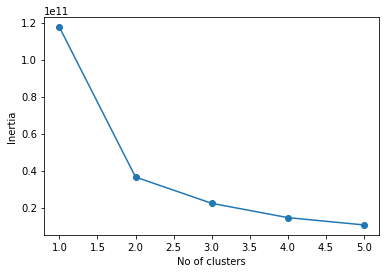

In [74]:
import matplotlib.pyplot as plt
plt.plot(ks,inertia,'-o')
plt.xlabel("No of clusters")
plt.ylabel("Inertia")
plt.show()

In [75]:
from sklearn.cluster import KMeans
model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(data)
labels = model_kmeans.predict(data)
print(labels)

[0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]


C:\Users\Sanza Vijin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


117459687469.0782
36528387934.322105
21710210039.754147
14610713446.535133
10655378083.862547
7655725089.094505
5353767457.732319
4258897193.751581
3228565265.6980796
2669181672.0337477


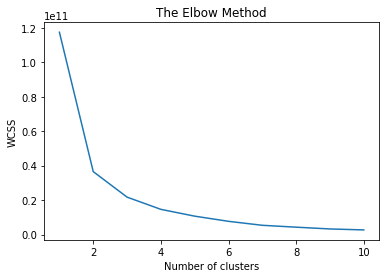

In [76]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    print (kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Hieararchial Clustering

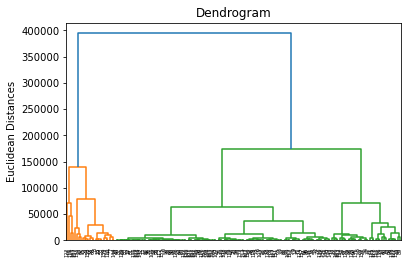

In [77]:
# using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))
plt.title('Dendrogram')

plt.ylabel('Euclidean Distances')
plt.show()

In [89]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_
df['labels'] = labels

In [90]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.64344923e-02 7.74955144e-03 2.07077643e-03 1.35403217e-02
  9.28949401e-01 2.76726033e-03 1.91313019e-02 1.44524797e-03
  3.61799157e-01]
 [1.89973424e-03 1.41159823e-03 5.18643396e-04 2.90914866e-03
  6.78742436e-01 3.45565877e-04 3.63893463e-03 1.78818699e-04
  7.29344202e-01]
 [8.97825056e-03 5.31715543e-03 8.68331532e-04 7.22389266e-03
  8.59180235e-01 1.29290058e-03 8.57853135e-03 5.64345487e-04
  5.07532729e-01]]


In [91]:
df_0 = df[df['labels'] == 0]
df_1 = df[df['labels'] == 1]
df_2 = df[df['labels'] == 2]

<function matplotlib.pyplot.show(close=None, block=None)>

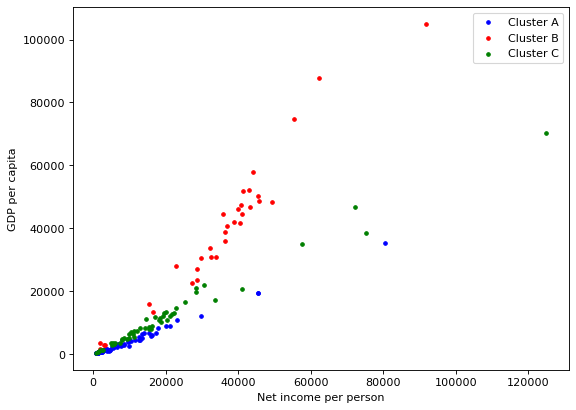

In [92]:
df_2 = df[df['labels'] == 2]
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_0['income'], df_0['gdpp'], c='blue', s=10, label='Cluster A')
plt.scatter(df_1['income'], df_1['gdpp'], c='red', s=10, label='Cluster B')
plt.scatter(df_2['income'], df_2['gdpp'], c='green', s=10, label='Cluster C')
plt.xlabel('Net income per person')
plt.ylabel('GDP per capita')
plt.legend(),
plt.show

Cluster A: Lower net income per person and The GDP per capita.
Cluster B: Highest net income per person and The GDP per capita
Cluster C: Medium net income per person and The GDP per capita

In [117]:
clusters_mean = data.groupby(['labels']).mean()
clusters_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
labels,,,,,,,,,
0,55.420732,33.628037,6.010732,43.103243,8538.829268,10.554524,66.456098,3.466585,3494.060976
1,10.545455,42.875758,9.866667,45.257576,34696.060606,3.503455,78.403030,2.103333,38552.121212
2,28.819231,51.784615,6.148846,53.898077,19577.096154,6.124635,72.040385,2.666154,11659.250000


Cluster A/0 with countries with the low indices of health, mortality, and net income. Cluster C/2 is having countries with average features.Cluster B is having high net income and other indices. Cluster B/1 is in more need of aid based on the socio-economic and health factors